**Downloading the data**

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"<username>","key":"<key>"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip gtsrb-german-traffic-sign

In [ ]:
import random
from matplotlib.image import imread
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow as tf

**Viewing the test Images**

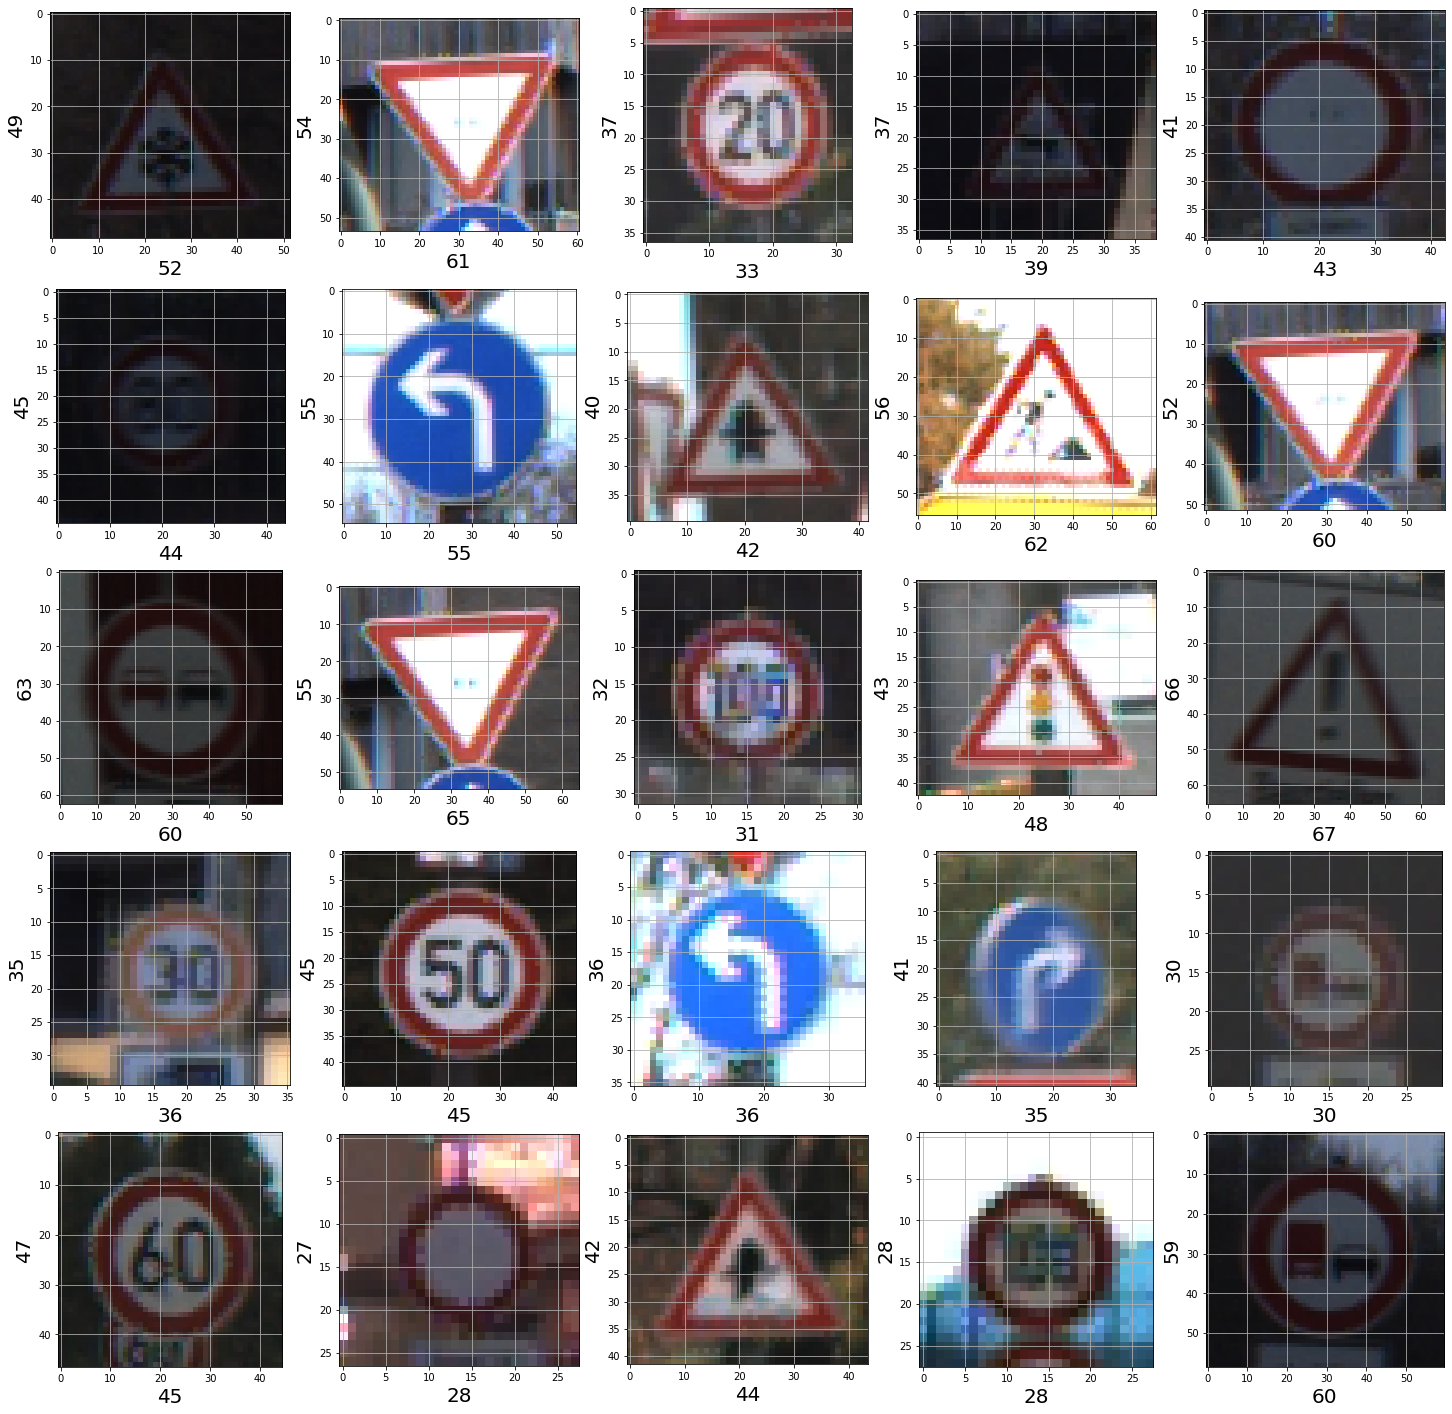

In [ ]:
data_dir = '/content/'
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

**Get the Image Data and Lables**

In [ ]:
image_data = []
image_labels = []

IMG_HEIGHT = 50
IMG_WIDTH  = 50

NUM_CATEGORIES = len(os.listdir(data_dir+"Train/"))
print("Total number of classes are : "+str(NUM_CATEGORIES))

for i in range(NUM_CATEGORIES):
    path = data_dir + 'Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        image = cv2.imread(path + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        image_data.append(np.array(resize_image))
        image_labels.append(i)

#list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

Total number of classes are : 43


In [ ]:
image_labels.shape

(39209,)

In [ ]:
image_data.shape

(39209, 50, 50, 3)

**Splitting the data into test and train**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

**One hot encoding of the labels**

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


**Making The Model**

In [ ]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

lr = 0.001
epochs = 30

opt = tf.keras.optimizers.legacy.Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

**Train The Model**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 32s 36ms/step - loss: 1.0039 - accuracy: 0.7306 - val_loss: 0.0871 - val_accuracy: 0.9738
Epoch 2/30
858/858 [==============================] - 31s 36ms/step - loss: 0.1674 - accuracy: 0.9511 - val_loss: 0.0748 - val_accuracy: 0.9782
Epoch 3/30
858/858 [==============================] - 30s 35ms/step - loss: 0.1097 - accuracy: 0.9679 - val_loss: 0.0256 - val_accuracy: 0.9937
Epoch 4/30
858/858 [==============================] - 29s 34ms/step - loss: 0.0698 - accuracy: 0.9790 - val_loss: 0.0431 - val_accuracy: 0.9869
Epoch 5/30
858/858 [==============================] - 29s 34ms/step - loss: 0.0655 - accuracy: 0.9799 - val_loss: 0.0468 - val_accuracy: 0.9876
Epoch 6/30
858/858 [==============================] - 31s 36ms/step - loss: 0.0506 - accuracy: 0.9851 - val_loss: 0.0094 - val_accuracy: 0.9977
Epoch 7/30
858/858 [==============================] - 29s 34ms/step - loss: 0.0482 - accuracy: 0.9856 - val_loss: 0.0154 - val_accuracy:

KeyboardInterrupt: ignored

**Stats**

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)
    

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)  

NameError: ignored

In [ ]:
score = model.evaluate(X_train,y_train,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

858/858 [==============================] - 4s 4ms/step - loss: 0.0057 - accuracy: 0.9982
Accuracy: 99.82%
Loss:  0.005675057880580425


In [ ]:
score = model.evaluate(X_val, y_val,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

368/368 [==============================] - 2s 5ms/step - loss: 0.0113 - accuracy: 0.9966
Accuracy: 99.66%
Loss:  0.011334480717778206


**Save the model**

In [ ]:
!mkdir '/content/model'
model.save('/content/model')

!zip -r model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/fingerprint.pb (stored 0%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 89%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model/variables/variables.index (deflated 70%)
  adding: content/model/keras_metadata.pb (deflated 93%)


In [ ]:
!cp model.zip /content/drive/MyDrive/traffic/

**Reload The Saved Model**

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

reconstructed_model = tf.keras.models.load_model('/content/model/')

def GetResultForImage(image_location):
  img = cv2.imread(image_location, cv2.COLOR_BGR2RGB)
  # Must be  (x,x,3)
  print('Original Dimensions : ',img.shape)
  resized = cv2.resize(img,(50,50),3)
  result = np.expand_dims(resized, axis=0)
  result=reconstructed_model.predict(result)
  print(np.argmax(result))
  cv2_imshow(resized)

**Predict With Random Images**

Original Dimensions :  (100, 100, 3)
1/1 [==============================] - 0s 173ms/step
33


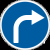

In [ ]:
GetResultForImage("/content/Meta/33.png")
#Expecting 33

Original Dimensions :  (100, 100, 3)
1/1 [==============================] - 0s 28ms/step
39


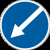

In [ ]:
GetResultForImage("/content/Meta/39.png")
#Expecting 39

Original Dimensions :  (100, 100, 3)
1/1 [==============================] - 0s 22ms/step
16


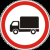

In [ ]:
GetResultForImage("/content/Meta/16.png")
#Expecting 16